# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/human_body_temperature.csv')

## Part 1

In [12]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y


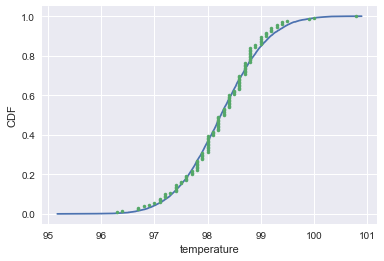

In [14]:
# computer the mean
mean = np.mean(df['temperature'])
# computer the std
std = np.std(df['temperature'])
# use normal distribution to draw 10000 samples 
samples = np.random.normal(mean, std, size=10000)
# get ecdf of original data
x, y = ecdf(df['temperature'])
# get ecdf of sampled data
x_theor, y_theor = ecdf(samples)

# plot data
sns.set()
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('temperature')
_ = plt.ylabel('CDF')
plt.show()

Result looks approximately normally distributed.

## Part 2

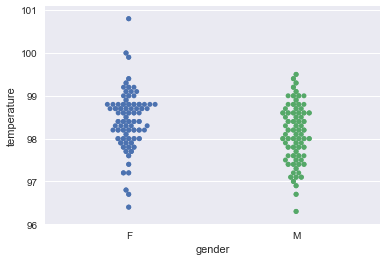

In [19]:
_ = sns.swarmplot(x='gender', y='temperature', data=df)
_ = plt.xlabel('gender')
_ = plt.ylabel('temperature')
plt.show()

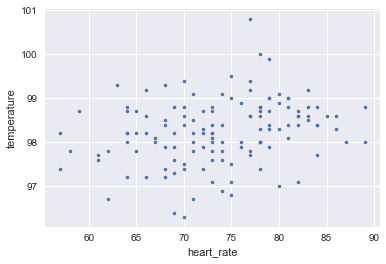

In [21]:
_ = plt.plot(df['heart_rate'], df['temperature'], marker='.', linestyle='none')
_ = plt.xlabel('heart_rate')
_ = plt.ylabel('temperature')
plt.show()

Result doesn't seem to be independent. Gender appears to have a strong correlation to temperature, temperatures from female have very different distribution than that of males'.

## Part 3

- One-sample because we have one sample of data that we want to compare against the population mean of 98.6.
- Both test seems not ideal, we don't have population's standard deviation for z-test and sample size is too big for t-test

In [35]:
# z-score
z_score = (98.6 - mean) / std
print('z-score: ', z_score)
# t-score
t_score = (98.6 - mean) / (std / np.sqrt(130))
print('t-score: ', t_score)


z-score:  0.48027041116080765
t-score:  5.47592520208


Mean does not seem to be 98.6.

## Part 4

In [38]:
sample = np.random.choice(df['temperature'], 10)
# z-score
z_score = (98.6 - mean) / std
print('z-score: ', z_score)
# t-score
t_score = (98.6 - np.mean(sample)) / (np.std(sample) / np.sqrt(10))
print('t-score: ', t_score)

z-score:  0.48027041116080765
t-score:  1.33242722835


For small sample sizes, t-test is the what we should use.

## Part 5

In [42]:
confidence_interval = np.percentile(df['temperature'], [2.5, 97.5])
print('95% confidence interval: ', confidence_interval)
margin_of_error = 1.96 * std / np.sqrt(130)
print('margin of error: ', margin_of_error)

95% confidence interval:  [ 96.7225  99.4775]
margin of error:  0.125550964803


Should be concerned when temperature is below 96.7 or above 99.4

## Part 6

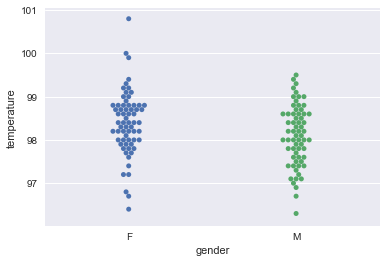

In [43]:
_ = sns.swarmplot(x='gender', y='temperature', data=df)
_ = plt.xlabel('gender')
_ = plt.ylabel('temperature')
plt.show()

In [64]:
female_temperature = []
male_temperature = []
for row in df.iterrows():
    if row[1][1] == 'F':
        female_temperature.append(row[1][0])
    else:
        male_temperature.append(row[1][0])
female_mean = np.mean(female_temperature)
female_median = np.median(female_temperature)
female_std = np.std(female_temperature)
male_mean = np.mean(male_temperature)
male_median = np.median(male_temperature)
male_std = np.std(male_temperature)
print('female mean: ', female_mean)
print('female median: ', female_median)
print('female std: ', female_std)
print('male mean: ', male_mean)
print('male median: ', male_median)
print('male std: ', male_std)

female mean:  98.3938461538
female median:  98.4
female std:  0.737746448643
male mean:  98.1046153846
male median:  98.1
male std:  0.693359884183


Looking at the beeswarm plot and the mean and standard deviation, there is a noticeable difference between female and male temperature. Female has larger standard deviations and higher mean compared to male, and also has more outliers which ties in with the larger standard deviation.

In [73]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

In [70]:
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

In [71]:
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

In [74]:
empirical_diff_means = female_mean - male_mean
# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(female_temperature, male_temperature,
                                 diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', p)

p-value = 0.0113


Using permutation test, it is very unlikely that the difference of means between female and male temperature can reach that of the dataset given the null hypothesis that the means are the same. There is strong evidence that female has higher mean than that of male and the overall mean can be skrewed by h